Objective:
1) Extract reviews of any product from ecommerce website like snapdeal and amazon
2) Perform sentimental analysis

In [1]:
"""
Created on 31st Aug 2020
@author: Shilpa Chavan
TextMining
"""

import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content
import re

In [2]:
link = "https://www.amazon.in/Test-Exclusive-746/product-reviews/B07DJHXTLJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [3]:
page = requests.get(link)

In [4]:
page


<Response [200]>

In [5]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41-crZfIjzL.css,11cMnOipjJL.css,017DsKjNQJL.css,01Vctty9pOL.css,01HEsUOLYvL.css,41EWOOlBJ9L.css,11PIM2x8KnL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01K+Ps1DeEL.css,314djKvMsUL.css,01ZTetsDh7L.css,01pbA9Lg3yL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01YhS3Cs-hL.css,21GwE3cR-y

In [6]:
soup = bs(page.content,'html.parser')

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,41-crZfIjzL.css,11cMnOipjJL.css,017DsKjNQJL.css,01Vctty9pOL.css,01HEsUOLYvL.css,41EWOOlBJ9L.css,11PIM2x8KnL.css,01ElnPiDxWL.css,11QxHU4QYaL.css,01Sp8sB1HiL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01evdoiemkL.css,01K+Ps1DeEL.css,314djKvMsUL.css,01ZTetsDh7L.css,01pbA9Lg3yL.css,21LK7jaicML.css,11L58Qpo0GL.css,21kyTi1FabL.css,01ruG+gDPFL.css,01YhS3Cs-hL.css,21GwE3cR-y

# Fetching customer names

In [8]:
names = soup.find_all('span',class_='a-profile-name')
#<span class="a-profile-name">Alexis</span>   'span',class_='a-profile-name'

In [9]:
names

[<span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Praggya</span>,
 <span class="a-profile-name">Praggya</span>,
 <span class="a-profile-name">Amazon Customer</span>,
 <span class="a-profile-name">Kshitij Kumar</span>,
 <span class="a-profile-name">manikanta</span>,
 <span class="a-profile-name">Vicky Sen</span>,
 <span class="a-profile-name">Rajesh Adhikary</span>,
 <span class="a-profile-name">Piyush Vaibhav</span>,
 <span class="a-profile-name">KESH</span>,
 <span class="a-profile-name">Dheeraj Malhotra</span>,
 <span class="a-profile-name">Avengers</span>]

In [10]:
len(names)

12

In [11]:
cust_name = []
for i in range(0,len(names)):
  cust_name.append(names[i].get_text())

In [12]:
cust_name

['Amazon Customer',
 'Praggya',
 'Praggya',
 'Amazon Customer',
 'Kshitij Kumar',
 'manikanta',
 'Vicky Sen',
 'Rajesh Adhikary',
 'Piyush Vaibhav',
 'KESH',
 'Dheeraj Malhotra',
 'Avengers']

In [13]:
cust_name.pop(0)
cust_name.pop(0)

'Praggya'

In [14]:
cust_name

['Praggya',
 'Amazon Customer',
 'Kshitij Kumar',
 'manikanta',
 'Vicky Sen',
 'Rajesh Adhikary',
 'Piyush Vaibhav',
 'KESH',
 'Dheeraj Malhotra',
 'Avengers']

# Fetching Review Title

In [15]:
title = soup.find_all('a',class_='review-title-content')

In [17]:
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3LLWXXD1Z1H2V?ASIN=B07DJHXTLJ">
 <span>Think and evaluate before you go for it</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R34CR90W5F1MR7?ASIN=B07DJHXTLJ">
 <span>Treat to the eye</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RHCUTQ5LT7BTQ?ASIN=B07DJHXTLJ">
 <span>Best experience</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/RJ1XR61YJSJ7S?ASIN=B07DJHXTLJ">
 <span>One Plus 7T - One Word, STUNNING!!</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-conten

In [18]:
review_title = []
for i in range(0,len(title)):
 review_title.append(title[i].get_text())

In [19]:
review_title

['\nThink and evaluate before you go for it\n',
 '\nTreat to the eye\n',
 '\nBest experience\n',
 '\nOne Plus 7T - One Word, STUNNING!!\n',
 '\nPlease improve your build quality other wise india will fire you 😠\n',
 '\nPro Camera, performance, looks. Cons Battery drain and heating up issues\n',
 '\nI think an all rounder!\n',
 "\nPLEASE SAVE YOUR MONEY AND DON'T BUY THIS PHONE.\n",
 '\nNo earphone jack\n',
 '\nGood phone\n']

In [20]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]#\n will be removed using lstrip means left strip or remove

In [21]:
review_title

['Think and evaluate before you go for it\n',
 'Treat to the eye\n',
 'Best experience\n',
 'One Plus 7T - One Word, STUNNING!!\n',
 'Please improve your build quality other wise india will fire you 😠\n',
 'Pro Camera, performance, looks. Cons Battery drain and heating up issues\n',
 'I think an all rounder!\n',
 "PLEASE SAVE YOUR MONEY AND DON'T BUY THIS PHONE.\n",
 'No earphone jack\n',
 'Good phone\n']

# Fetching reviews Ratings

In [22]:
rating = soup.find_all('i',class_='review-rating')


In [23]:
rating

[<i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating-view-point"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-3 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">3.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-4 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">4.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-5 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">5.0 out of 5 stars</span></i>,
 <i class="a-icon a-icon-star a-star-1 review-rating" data-hook="review-star-rating"><span class="a-icon-alt">1.0 out of 5 stars</sp

In [24]:
rate = []
for i in range(0,len(rating)):
  rate.append(rating[i].get_text())  
rate

['4.0 out of 5 stars',
 '3.0 out of 5 stars',
 '3.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars']

In [25]:
rate.pop(0)

'4.0 out of 5 stars'

In [26]:
rate.pop(0)

'3.0 out of 5 stars'

In [27]:
rate

['3.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '4.0 out of 5 stars',
 '5.0 out of 5 stars']

# Fetching Reviews content

In [28]:
review = soup.find_all('span',class_='review-text-content') 

#<span data-hook="review-body" class="a-size-base review-text review-text-content">

In [29]:
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   After reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free. So pls don't go by them blindly. Go for users reviews who bought them with their own money. So I am writing my 5 days experience with the phone.<br/>I am not a gamer or a geek. A regular user who wants to do all the office work on the phone, social media, blogging and vlogging, etc.<br/>The last OnePlus phone I was using was Oneplus 5 and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself.<br/><br/>The day it arrived from Amazon I opened it w

In [30]:
#this loop is for actual content
review_content = []
for i in range(0,len(review)):
  review_content.append(review[i].get_text())  
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>
   After reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free. So pls don't go by them blindly. Go for users reviews who bought them with their own money. So I am writing my 5 days experience with the phone.<br/>I am not a gamer or a geek. A regular user who wants to do all the office work on the phone, social media, blogging and vlogging, etc.<br/>The last OnePlus phone I was using was Oneplus 5 and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself.<br/><br/>The day it arrived from Amazon I opened it w

In [ ]:
cust_name
review_title
rate
review_content

In [31]:
import pandas as pd

In [32]:
df = pd.DataFrame()

In [33]:
df['customer_name'] = cust_name

In [34]:
df['Title'] = review_title

In [35]:
df['rating'] = rate

In [37]:
df['review'] = review_content

In [39]:
df

,customer_name,Title,rating,review
0,Praggya,Think and evaluate before you go for it\n,3.0 out of 5 stars,\n\n After reading a lot of geeky reviews on ...
1,Amazon Customer,Treat to the eye\n,4.0 out of 5 stars,\n\n Detailed review --Design - 4/5+Reduced n...
2,Kshitij Kumar,Best experience\n,5.0 out of 5 stars,\n\n Awesome experience..best in class camera...
3,manikanta,"One Plus 7T - One Word, STUNNING!!\n",5.0 out of 5 stars,\n\n I received One Plus 7T 2 days back. I wi...
4,Vicky Sen,Please improve your build quality other wise i...,1.0 out of 5 stars,\n\n My first one+7t & its make me so sad. I ...
5,Rajesh Adhikary,"Pro Camera, performance, looks. Cons Battery d...",4.0 out of 5 stars,"\n\n This phone has great performance, good c..."
6,Piyush Vaibhav,I think an all rounder!\n,5.0 out of 5 stars,\n\n I am among the first to buy this phone w...
7,KESH,PLEASE SAVE YOUR MONEY AND DON'T BUY THIS PHON...,1.0 out of 5 stars,\n\n THIS IS ONE OF THE WORST PHONE I HAVE EV...
8,Dheeraj Malhotra,No earphone jack\n,4.0 out of 5 stars,\n\n No earphone jack\n\n
9,Avengers,Good phone\n,5.0 out of 5 stars,\n\n A One plus user.Oneplus One -> Oneplus 3...


In [49]:
df.to_csv(r'D:\Shilpa\Datascience\Assignments\TextMining\amazonreview.csv',index=True)

In [ ]:
#Another Approach

In [51]:
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

#import nltk
#from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
# creating empty reviews list 
iphone_reviews=[]

for i in range(1,20):
  ip=[]  
  #url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
  url = "https://www.amazon.in/Test-Exclusive-746/product-reviews/B07DJHXTLJ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all('span',class_='review-text-content')# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  iphone_reviews=iphone_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews

iphone_reviews

["\n\n  After reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free. So pls don't go by them blindly. Go for users reviews who bought them with their own money. So I am writing my 5 days experience with the phone.I am not a gamer or a geek. A regular user who wants to do all the office work on the phone, social media, blogging and vlogging, etc.The last OnePlus phone I was using was Oneplus 5 and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself.The day it arrived from Amazon I opened it with a lot of excitement which continued till I have held it in my hands.Here are the issues:1. Weight: It w

In [68]:
# writng reviews in a text file 
with open("D:\\Shilpa\\Datascience\\Assignments\\TextMining\\iphone.txt","w",encoding='utf8') as output:
    output.write(str(iphone_reviews))

In [58]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)

# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [60]:
ip_reviews_words = ip_rev_string.split(" ")
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

with open("D:\\Shilpa\\Datascience\\Assignments\\TextMining\\stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

temp = ["this","is","awsome","Data","Science"]
[i for i in temp if i not in "is"]

ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


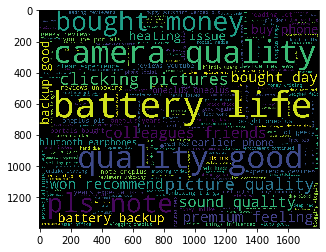

In [62]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

# positive words # Choose the path for +ve words stored in system
with open("D:\\Shilpa\\Datascience\\Assignments\\TextMining\\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]

# negative words  Choose path for -ve words stored in system
with open("D:\\Shilpa\\Datascience\\Assignments\\TextMining\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

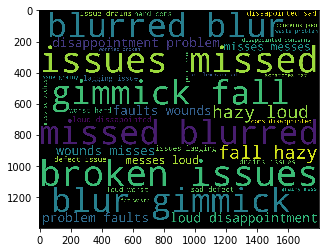

In [63]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

<module 'nltk' from 'C:\\Users\\Dell\\anaconda3\\lib\\site-packages\\nltk\\__init__.py'>

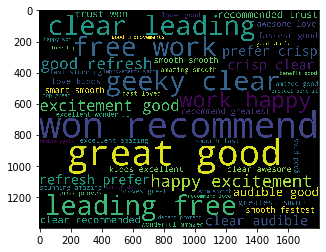

In [64]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)

nltk

In [65]:
# Unique words 
iphone_unique_words = list(set(" ".join(iphone_reviews).split(" ")))

In [67]:
print(iphone_unique_words)

['', 'received', '4.7/5Performance', 'Camera', 'photos', 'HAPPY', 'portals,', 'models', 'believe', 'about', 'so', 'display', 'red', "it's", 'MONEY.\n\n', 'clicking', 'output\n\n', 'sad.', 'wants', 'volumes.', '4.8/5CONSNO', 'Mi,', 'pic', '40,000', "Don't", 'source', 'from', 'or', 'SINCE', 'to', 'could', 'trust', 'it', 'really', 'checked', 'still', 'FAT', 'flagships', 'No', 'high', 'devices.\n\n', 'per', 'quickly', 'user', '-3.5/5+Fastest', '(But', 'there', '11', '7', 'experience', 'etc.The', 'This', 'would', 'provided,one', 'OF', 'it.The', 'loved', 'DONT', 'CAN', 'out', 'GRAINY', 'broken', 'stick', 'held', 'packaging.Coming', 'give', 'me', 'of', 'a', 'image', 'at', 'came', 'other', 'BUT', '16', '3', 'next', 'fall', 'feel', 'were', 'YouTube', 'anyone', 'one', 'update', 'INSTEAD', "don't", 'bit.', 'display.', 'in', 'But', 'POOR.', 'be', 'happy', '40', 'OSDisplay', 'husky.', 'If', 'PICTURE', 'better', 'STAKE.', 'SCRATCHES.', 'improvements.', 'phone', 'natural', 'CAMERAS', 'their', 'sellin